In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.integrate import solve_ivp
from matplotlib.patches import Polygon
import math

In [2]:
plt.rcParams.update({'text.latex.preamble' : r'\usepackage{amssymb}'})
plt.rcParams.update({'text.usetex': True,'font.serif': 'sans-serif'})
plt.rcParams['xtick.labelsize'] = 9.5
plt.rcParams['ytick.labelsize'] = 9.5
#plt.rcParams['axes.spines.top'] = False
#plt.rcParams['axes.spines.right'] = False
plt.rcParams['figure.dpi'] = 200
plt.rcParams['axes.titley'] = 1.0
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['axes.labelsize'] = 11
plt.rcParams['legend.fontsize'] = 8
plt.rcParams['legend.edgecolor'] = 'k'
plt.rcParams['legend.fancybox'] = False
#np.seterr(all='raise')
%pprint

Pretty printing has been turned OFF


In [3]:
c = 2.997*10**(8)          # Velocidad de la luz en unidades S.I.
G = 6.673*10**(-11)        # Constante de gravitación universal en unidades S.I.
Msol = 1.989*10**(30)      # 1 Masa solar en kilogramos

### Ecuaciones de estructura
\begin{eqnarray}
        \frac{\mathrm{d}P}{\mathrm{d}r} &=& -\left(\rho + \tilde{\rho} + P\right)\frac{\mathrm{d}\nu}{\mathrm{d}r}\,;\quad \tilde{\rho} = \beta\rho\,;\quad \rho = \rho_{c}\left(1-\alpha r^{2}\right)\,,\quad P\left(R\right) = 0\\
    \frac{\mathrm{d}\nu}{\mathrm{d}r} &=& \frac{m + 4\pi r^{3}P}{r\left(r - 2m\right)}\,,\quad \nu\left(R\right) = \frac{1}{2}\ln\left(1 - \frac{2M}{R}\right) \\
    \frac{\mathrm{d}m}{\mathrm{d}r} &=& 4\pi r^{2}\rho\,, \quad m\left(R\right) = M   \\
\end{eqnarray}

### Adimensionalización
Se adimensionalizan las ecuaciones de estructura proponiendo
\begin{align*}
    \quad r = R x \,, \quad m = R\hat{m}\,, \quad P = \frac{1}{R^{2}}\hat{P}\,, \quad \rho = \frac{1}{R^{2}}\hat{\rho}\,, \quad \alpha = \frac{1}{R^{2}}\hat{\alpha}\,, \quad \rho_{c} = \frac{1}{R^{2}}\hat{\rho}_{c}\,,
\end{align*}
de donde se obtiene
\begin{eqnarray}
        \frac{\mathrm{d}\hat{P}}{\mathrm{d}x} &=& -\left[\hat{\rho} \left(1 + \beta\right) + \hat{P}\right]\frac{\mathrm{d}\nu}{\mathrm{d}x}\,;\quad \hat{\rho} = \hat{\rho}_{c}\left[1-\left(1-\varkappa\right) x^{2}\right]\,,\quad \hat{P}\left(x=1\right) = 0\\
    \frac{\mathrm{d}\nu}{\mathrm{d}x} &=& \frac{\hat{m} + 4\pi x^{3}\hat{P}}{x\left(x - 2\hat{m}\right)}\,,\quad \nu\left(x=1\right) = \frac{1}{2}\ln\left(1 - 2\mu\right)\,; \quad \mu = \frac{M}{R} \\
    \frac{\mathrm{d}\hat{m}}{\mathrm{d}x} &=& 4\pi x^{2}\hat{\rho}\,, \quad \hat{m}\left(x=1\right) = \mu\,.   \\
\end{eqnarray}

Dando $\mu$ se tiene que
\begin{equation}
        \hat{\rho}_{c} = \frac{\mu}{4\pi\left[\frac{1}{3} - \left(1-\varkappa\right)\frac{1}{5}\right]} \quad \Rightarrow \quad R = \sqrt{\frac{\hat{\rho}_{c}c^{2}}{\rho_{c}G}} \quad \Rightarrow \quad M = \frac{\mu R c^{2}}{G}\,.
\end{equation}


### Anisotropía
\begin{equation}
    \tilde{\rho} = \frac{2 J_{1}}{a_{1}}\Pi  \quad \Rightarrow \quad \Pi = \frac{1}{2}\frac{a_{1}}{J_{1}}\tilde{\rho} = \frac{1}{2}\beta r \nu^{\prime}\rho\,.
\end{equation}


In [4]:
def EcEqHid(x,P_,rho_c_hat,varkappa,beta):
    return -(rhohat(x,rho_c_hat,varkappa)*(1 + beta) + P_)*((mhat(x,rho_c_hat,varkappa) + 4*np.pi*x**3*P_)/(x*(x - 2*mhat(x,rho_c_hat,varkappa))))

def rhohat(x,rho_c_hat,varkappa):
    return rho_c_hat*(1 - (1 - varkappa)*x**2)

def mhat(x,rho_c_hat,varkappa):
    return 4*np.pi*rho_c_hat*((x**3/3)-(1-varkappa)*(x**5/5))


In [5]:
Lista_beta = np.round(np.linspace(0.0,-0.60,61,endpoint=True),2)
#Lista_beta = np.round(np.linspace(0.0,-0.60,10,endpoint=True),2)
#Lista_beta = [-0.44]
print('Valores de \u03b2: ',end='')
print(*Lista_beta, sep=', ')

Lista_compacidad = np.round(np.linspace(0.06,0.33,10),2)
print('Valores de \u03bc: ',end='')
print(*Lista_compacidad, sep=', ')

Lista_varkappa = np.round(np.linspace(0.0,0.9,10),1)
print('Valores de \u03f0: ',end='')
print(*Lista_varkappa, sep=', ')


ListaModelos = []                

Valores de β: 0.0, -0.01, -0.02, -0.03, -0.04, -0.05, -0.06, -0.07, -0.08, -0.09, -0.1, -0.11, -0.12, -0.13, -0.14, -0.15, -0.16, -0.17, -0.18, -0.19, -0.2, -0.21, -0.22, -0.23, -0.24, -0.25, -0.26, -0.27, -0.28, -0.29, -0.3, -0.31, -0.32, -0.33, -0.34, -0.35, -0.36, -0.37, -0.38, -0.39, -0.4, -0.41, -0.42, -0.43, -0.44, -0.45, -0.46, -0.47, -0.48, -0.49, -0.5, -0.51, -0.52, -0.53, -0.54, -0.55, -0.56, -0.57, -0.58, -0.59, -0.6
Valores de μ: 0.06, 0.09, 0.12, 0.15, 0.18, 0.21, 0.24, 0.27, 0.3, 0.33
Valores de ϰ: 0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9


In [6]:
%%time

Z = []

for i in range(len(Lista_beta)):
    
    Z.append([])
    
    beta = Lista_beta[i]
    
    for j in range(len(Lista_compacidad)):
        
        mu = Lista_compacidad[j]
        
        for k in range(len(Lista_varkappa)):
            
            varkappa = Lista_varkappa[k]
                
            CondsCumps = 9
            
            rho_c_hat = mu/(4*np.pi*((1/3) - (1-varkappa)/5))
            
            P0 = 10**-15                
            
            xmin = 10**-15   
            xmax = 1.0
            x_span = (xmax,xmin) 
            
            soluciones = solve_ivp(EcEqHid,x_span,[P0],args=[rho_c_hat,varkappa,beta],method='RK45',max_step=1/100)
            
            x = soluciones.t[::-1]  
            P_hat = soluciones.y[0][::-1] 
            m_hat = mhat(x,rho_c_hat,varkappa)
            
            if x[0] == xmin:
                
                em2lambda = 1 - 2*m_hat/x
                
                rho_hat = rhohat(x,rho_c_hat,varkappa)
                rho_til = beta*rho_hat
                Pt_hat = P_hat - (1/2)*beta*x*((m_hat + 4*np.pi*x**3*P_hat)/(x*(x - 2*m_hat)))*rho_hat
                
                grad_rho_hat = np.gradient(rho_hat,x)
                grad_P_hat = np.gradient(P_hat,x)
                grad_Pt_hat = np.gradient(Pt_hat,x)
                
                vs2 = grad_P_hat/grad_rho_hat
                vst2 = grad_Pt_hat/grad_rho_hat
                
                grad_vs2 = np.gradient(vs2,x)
                grad_grad_rho_hat = np.gradient(grad_rho_hat,x)
                
                var = [m_hat,rho_hat,rho_til,P_hat,Pt_hat]
                
                ## Condición 1
                C1 = 2*m_hat/x
                
                if any(C1 >= 1): CondsCumps = CondsCumps - 1
                else: pass
                
                ## Condición 2
                C2A = rho_hat
                C2B = P_hat
                C2C = Pt_hat
                C2 = [C2A,C2B,C2C]
                
                if any(C2[0] < 0) or any(C2[1] < 0) or any(C2[2] < 0): CondsCumps = CondsCumps - 1
                else: pass
                
                ## Condición 3
                C3A = grad_rho_hat
                C3B = grad_P_hat
                C3C = grad_Pt_hat
                C3 = [C3A,C3B,C3C]
                
                if any(C3[0] > 0) or any (C3[1] > 0) or any (C3[2] > 0): CondsCumps = CondsCumps - 1
                else: pass
                
                ## Condición 4
                C4A = vs2
                C4B = vst2
                C4 = [C4A,C4B]
                
                if any(C4[0] > 1) or any(C4[1] > 1): CondsCumps = CondsCumps - 1
                else: pass
                
                ## Condición 5
                #C5 = rho_hat - P_hat - 2*Pt_hat
                #
                #if any(C5[:-1] < 0): CondsCumps = CondsCumps - 1
                #else: pass
                
                ## Condición 6
                C6 = ((rho_hat[:-1] + P_hat[:-1])*vs2[:-1]/P_hat[:-1])
                
                if any(C6 < 4/3): CondsCumps = CondsCumps - 1
                else: pass
                
                
                ## Condición 8
                C8rho = (1+beta)*(m_hat + 4*np.pi*x**3*P_hat)/x/(x - 2*m_hat)
                C8P = ((m_hat + 4*np.pi*x**3*(rho_hat*(1+beta) + 2*P_hat))/x/(x - 2*m_hat))*vs2
                C8m = ((rho_hat*(1+beta) + P_hat)*(1 + 8*np.pi*x**2*P_hat)/(x - 2*m_hat)**2)*(4*np.pi*x**2*rho_hat/grad_rho_hat)
                C8dP = grad_vs2 + vs2*grad_grad_rho_hat/grad_rho_hat
                C8T = C8rho + C8P + C8m + C8dP
                
                C8 = [C8T,C8rho,C8P,C8m,C8dP]
                
                if any(np.diff(np.sign(C8[0][:-2])) != 0): CondsCumps = CondsCumps - 1
                else: pass
                
                C9 = grad_grad_rho_hat
                
                Z[i].append(int(CondsCumps))
                
            else:
                
                Z[i].append(np.nan)
                pass
                                    
    Z[i] = np.flipud(np.array(Z[i]).reshape(len(Lista_compacidad),len(Lista_varkappa)).T)
    

CPU times: total: 54.2 s
Wall time: 1min 57s


In [7]:
lx = (Lista_compacidad[1]-Lista_compacidad[0])/2; ly = (Lista_varkappa[1]-Lista_varkappa[0])/2
xzmin = np.round(Lista_compacidad[0] - lx,3); xzmax = np.round(Lista_compacidad[-1] + lx,3)
yzmin = np.round(Lista_varkappa[0] - ly,3); yzmax = np.round(Lista_varkappa[-1] + ly,3)

C:\Users\danie\AppData\Local\Temp\ipykernel_6288\3046014810.py:32: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


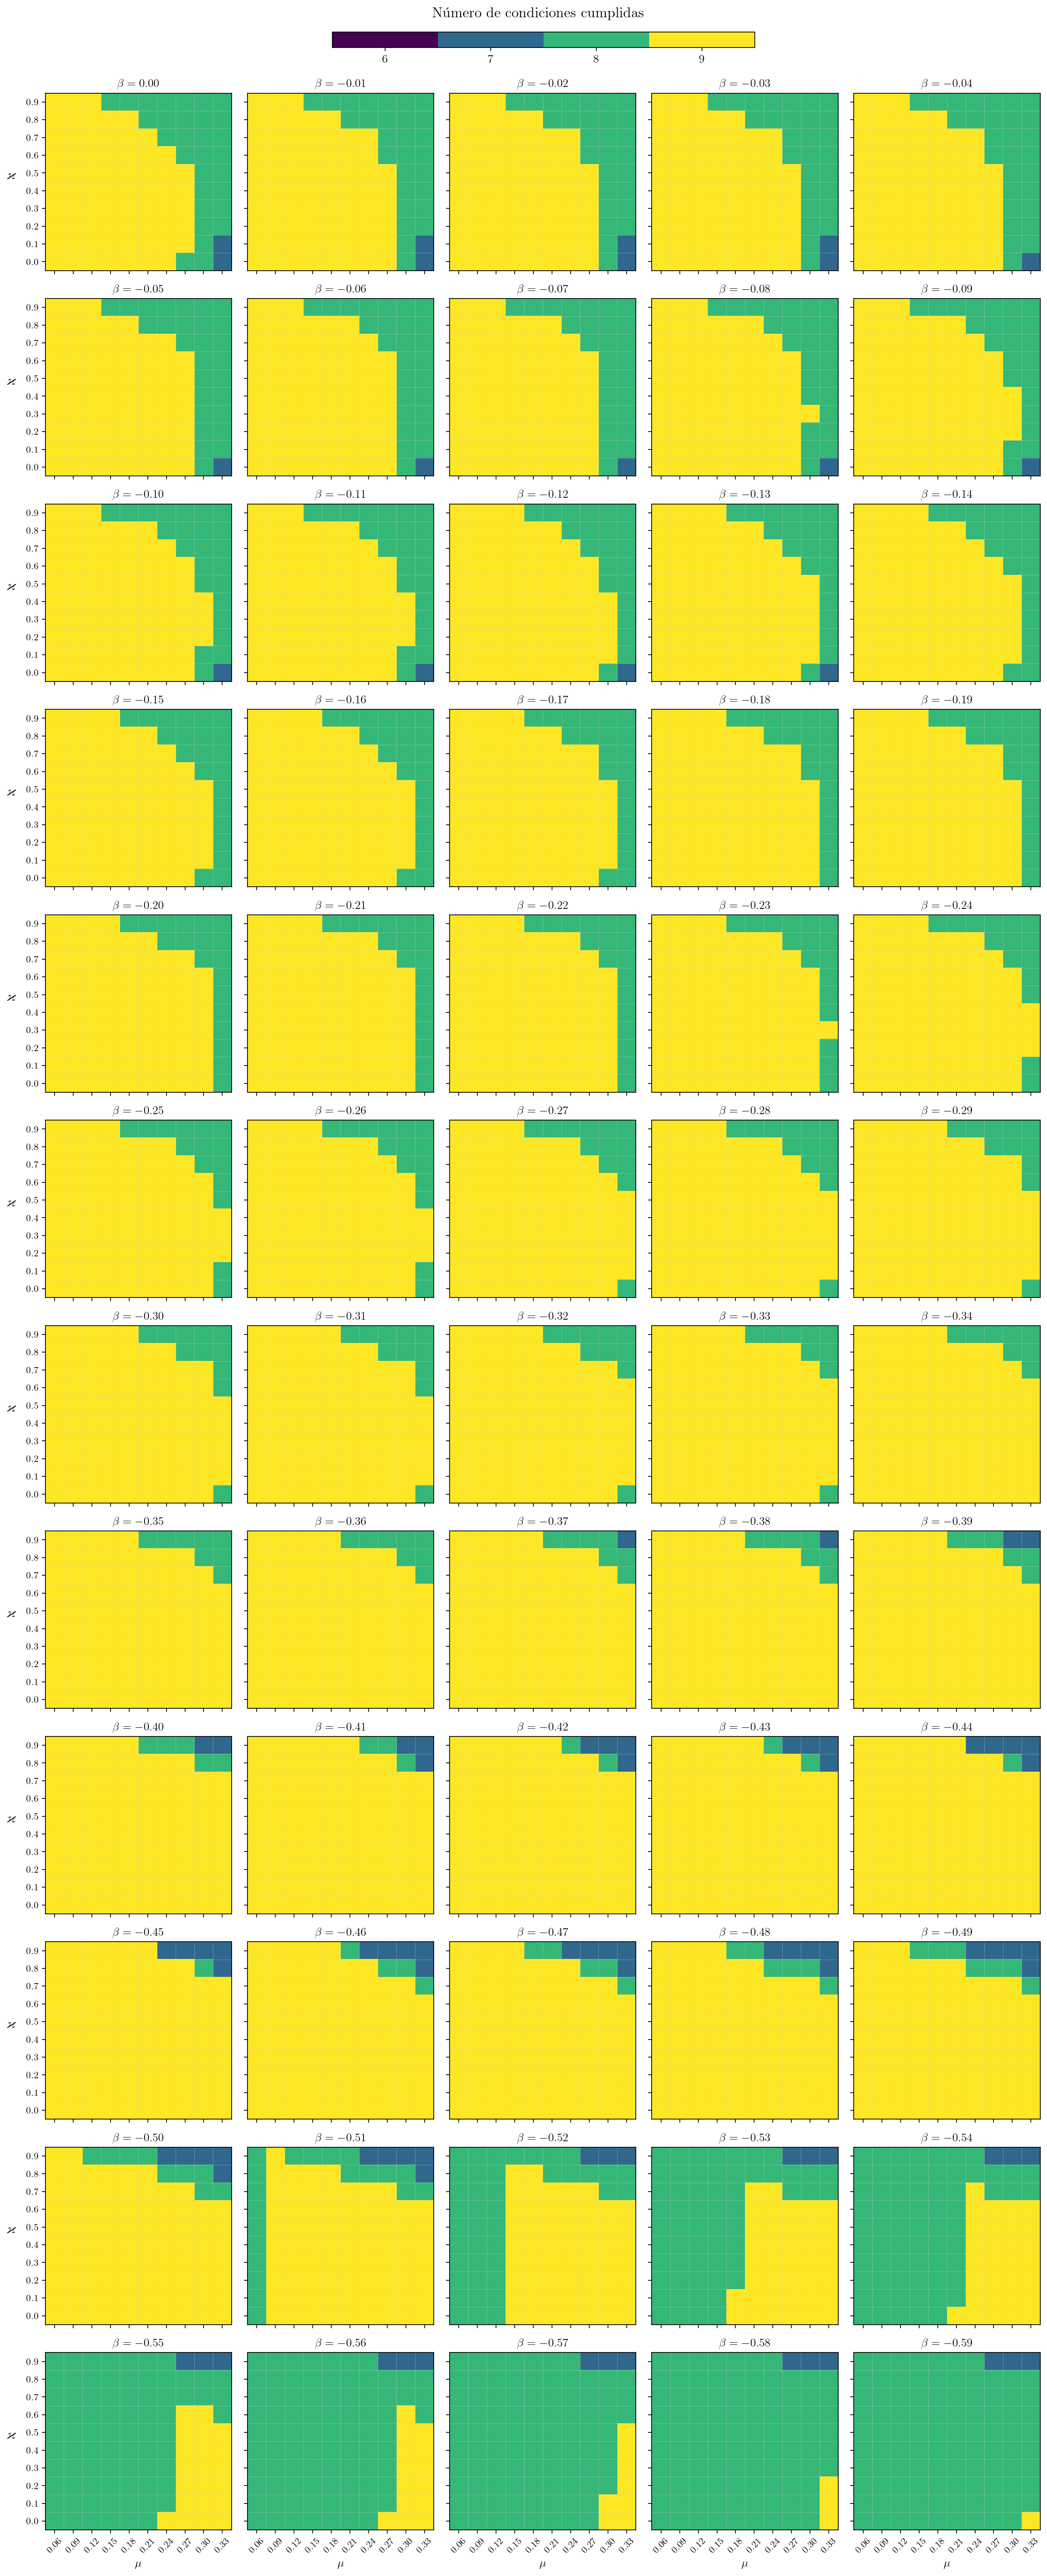

In [8]:
fig, axs = plt.subplots(nrows=int(len(Lista_beta)/5),ncols=5,sharey=True,sharex=True,figsize=(15,int(len(Lista_beta)*3/5)))

lx = (Lista_compacidad[1]-Lista_compacidad[0])/2; ly = (Lista_varkappa[1]-Lista_varkappa[0])/2
xzmin = np.round(Lista_compacidad[0] - lx,3); xzmax = np.round(Lista_compacidad[-1] + lx,3)
yzmin = np.round(Lista_varkappa[0] - ly,3); yzmax = np.round(Lista_varkappa[-1] + ly,3)

for i in range(int(len(Lista_beta)/5)):
    
    for j in range(5):
        
        axs[i,j].imshow(Z[5*i+j],aspect='auto',vmin=6,vmax=9,cmap='viridis',extent=[xzmin,xzmax,yzmin,yzmax])
        
        axs[i,0].set_ylabel(r'$\varkappa$',fontsize=14,rotation=0,labelpad=15)
        axs[-1,j].set_xlabel(r'$\mu$',fontsize=12)
        axs[-1,j].set_xticks(Lista_compacidad)
        axs[-1,j].tick_params(axis='x', labelrotation=45)
        axs[i,0].set_yticks(Lista_varkappa)   
        axs[-1,j].set_xticks(Lista_compacidad[:-1] + lx,minor=True)
        axs[i,0].set_yticks(Lista_varkappa[:-1] + ly,minor=True)
        axs[i,j].grid(which='minor',color='lightgray',linestyle='dashed',linewidth=0.25)
        axs[i,j].tick_params(which='minor',bottom=False,left=False)
        
        axs[i,j].set_title(fr'$\beta = {Lista_beta[5*i+j]:.2f}$',fontsize=12)
        
        
plt.suptitle(fr'$\textrm{{Número de condiciones cumplidas}}$',fontsize=15,x=0.513,y=1.015)
cb = fig.colorbar(axs[0,0].imshow(Z[0],aspect='auto',vmin=6,vmax=9,cmap='viridis',extent=[xzmin,xzmax,yzmin,yzmax]),
                  spacing='proportional',orientation="horizontal",ticks=[6,7,8,9],
                  boundaries=[5.5,6.5,7.5,8.5,9.5],cax=fig.add_axes([0.318,0.999,0.4,0.075/(len(Lista_beta)/5)]))
cb.ax.tick_params(labelsize=12)

plt.tight_layout()
plt.show()

In [9]:
N = Z.copy()
N = [N[i].tolist() for i in range(len(N))]
N = [[x for y in N[i] for x in y] for i in range(len(N))]

Conteo = np.zeros(10)
Conteo = [[x.count(i) for x in N] for i in range(len(Conteo))]
ListaBeta = Lista_beta.copy()

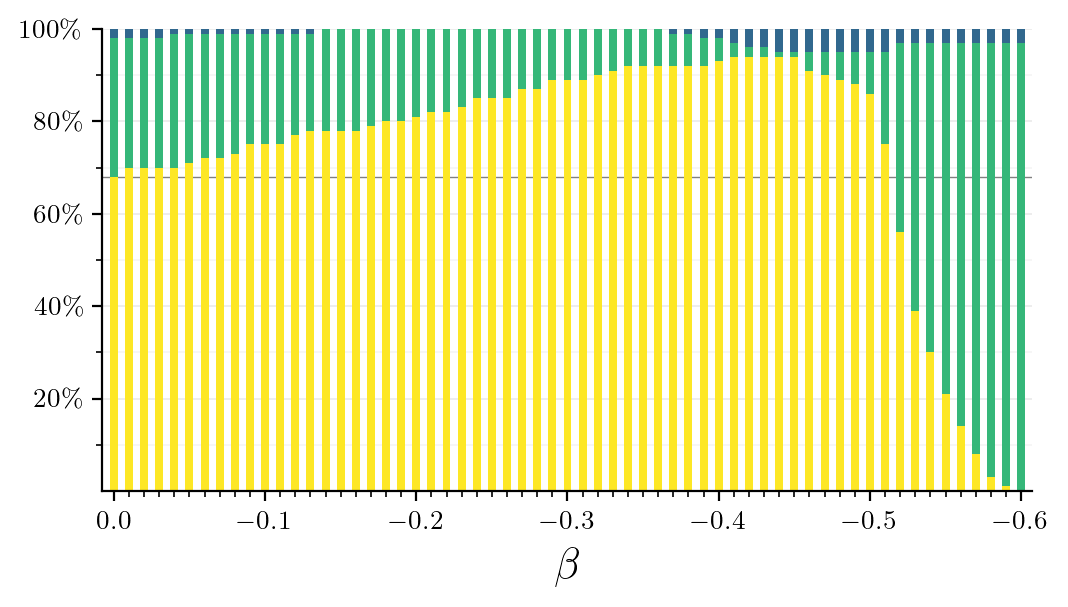

In [10]:
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False

fig,ax1 = plt.subplots(nrows=1,ncols=1,figsize=(6,3))

#ax1.set_title(r'Sin condición sobre la traza',fontsize=12)

bottom1 = Conteo[9]; bottom2 = np.add(Conteo[9],Conteo[8]); bottom3 = np.add(bottom2,Conteo[7])

ax1.axhline(y=68,lw=0.5,c='gray',zorder=-1)

ax1.bar(ListaBeta,Conteo[9],width=0.00525,color="#FDE725",label='9',align='center')
ax1.bar(ListaBeta,Conteo[8],width=0.00525,color="#35B779",bottom=bottom1,label='8',align='center')
ax1.bar(ListaBeta,Conteo[7],width=0.00525,color="#31688E",bottom=bottom2,label='7',align='center')
ax1.bar(ListaBeta,Conteo[6],width=0.00525,color="#440154",bottom=bottom3,label='6',align='center')


ax1.set_xlabel(r'$\beta$',fontsize=16,rotation=0,labelpad=5)
#ax1.set_ylabel(r'$\textrm{{Número de condiciones cumplidas}}$',fontsize=12,rotation=90,labelpad=15)

ax1.set_xbound(0.0075,-0.6075)
ax1.set_xticks(np.round(np.linspace(-0.05,-0.55,6),2),minor=True)
ax1.set_xticks(np.round(np.linspace(0.0,-0.6,61),2),minor=True)
ax1.set_yticks(np.round(np.linspace(10,90,5)),minor=True)
ax1.set_yticks([20,40,60,80,100],[r'$20\%$',r'$40\%$',r'$60\%$',r'$80\%$',r'$100\%$'])
ax1.grid(color='gray',lw=0.1,axis='y',which='major')
ax1.grid(color='gray',lw=0.05,axis='y',which='minor')
ax1.set_axisbelow(True)


#ax1.legend(ncol=1,loc=(1.01,0.35),fontsize=8,edgecolor='k')


ax1.invert_xaxis()
#plt.tight_layout()
plt.show()